In [ ]:
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from google.colab import files

# Charger les segments

uploaded = files.upload()

data = np.load("segment_00001.npz")

print(data.files)

X = data['data']  # shape: (nb_segments, 256)
y = data['label']  # shape: (nb_segments,)



# Afficher les formes (shapes) pour vérification
print("X (5 premières lignes):\n", X[:5])
print("y (5 premières étiquettes):\n", y[:0])

# Normalisation (important pour LSTM)
# X = (X - X.mean()) / X.std()

# # Découper en train/test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Convertir en tenseurs pour LSTM (batch, sequence, features)
# X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)  # (batch, 256, 1)
# X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)
# y_train = torch.tensor(y_train, dtype=torch.long)
# y_test = torch.tensor(y_test, dtype=torch.long)


Saving segment_00001.npz to segment_00001 (6).npz
['data', 'label']
X (5 premières lignes):
 [[ 0.13   0.142  0.088 ... -0.219 -0.252 -0.213]
 [-0.272 -0.247 -0.199 ...  0.268  0.3    0.284]
 [-0.279 -0.426 -0.444 ...  0.053  0.144  0.221]
 [-0.    -0.06  -0.072 ...  0.19   0.217  0.248]
 [-0.1   -0.052  0.103 ... -0.12  -0.059  0.044]]


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
from glob import glob

segment_files = sorted(glob("modeldata/*.npz"))

X = []
y = []

for file in segment_files:
    data = np.load(file)
    X.append(data['data'])     # shape: (256, 36864)
    y.append(data['label'])    # 0 ou 1

X = np.array(X)  # shape: (num_segments, 256, 36864)
y = np.array(y)  # shape: (num_segments,)
print("Shape de X:", X.shape)
print("Shape de y:", y.shape)

Shape de X: (19, 256, 36864)
Shape de y: (19,)


Nombre de segments: 19
Longueur temporelle de chaque segment: 256
Nombre de features/canaux par pas de temps: 36864
Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Visualisation interactive disponible:


interactive(children=(IntSlider(value=0, description='segment_idx', max=18), IntSlider(value=0, description='f…

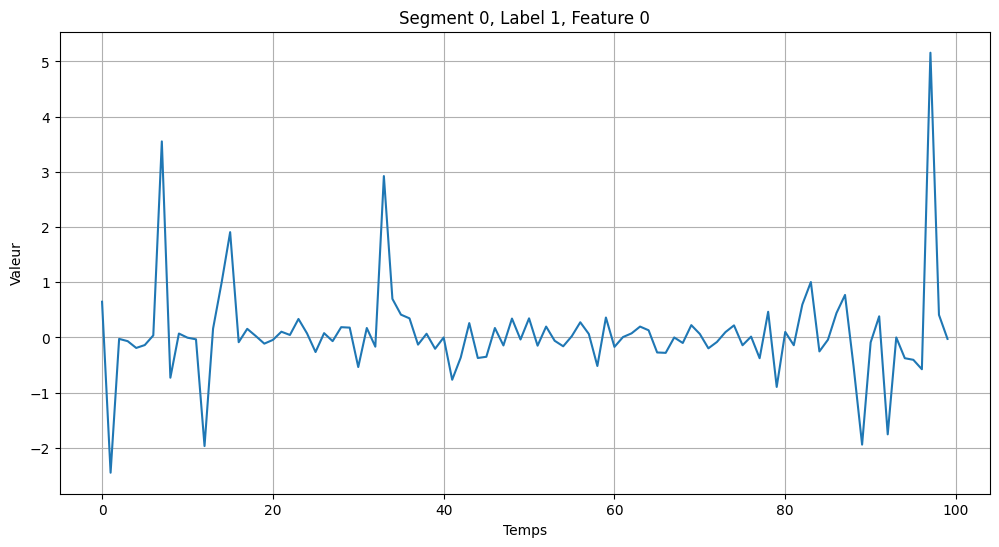


Statistiques descriptives:
Valeurs moyennes par segment: [ 7.32762655e-04  1.37691392e-03  9.41664802e-04  3.85869132e-04
  8.51256794e-04  1.06577767e-04  3.73742104e-04  1.73381382e-04
 -5.37091891e-04 -4.41979938e-04 -7.66131507e-04 -8.90170733e-04
 -3.82286496e-04 -5.61864747e-04 -2.90499263e-04 -5.19137912e-06
 -4.32128059e-04 -1.26802656e-05 -3.04359012e-04]
Étendue des valeurs: [-26.951, 26.717]
Répartition des labels: [ 0 19]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

# Charger les données (comme dans votre code original)
segment_files = sorted(glob("modeldata/*.npz"))
X = []
y = []
for file in segment_files:
    data = np.load(file)
    X.append(data['data'])
    y.append(data['label'])
X = np.array(X)
y = np.array(y)

print(f"Nombre de segments: {X.shape[0]}")
print(f"Longueur temporelle de chaque segment: {X.shape[1]}")
print(f"Nombre de features/canaux par pas de temps: {X.shape[2]}")
print(f"Labels: {y}")

# Fonction pour visualiser un segment
def plot_segment(segment_idx, feature_idx=0, num_points=100):
    """Visualise un segment particulier pour une feature donnée"""
    plt.figure(figsize=(12, 6))

    # Si feature_idx est 'all', on plot toutes les features (attention si 36864 features!)
    if feature_idx == 'all':
        # On prend un sous-ensemble pour éviter la surcharge
        for i in range(0, X.shape[2], X.shape[2]//10):  # Affiche 10 features max
            plt.plot(X[segment_idx, :num_points, i], label=f'Feature {i}')
        plt.legend()
    else:
        plt.plot(X[segment_idx, :num_points, feature_idx])
        plt.title(f'Segment {segment_idx}, Label {y[segment_idx]}, Feature {feature_idx}')

    plt.xlabel('Temps')
    plt.ylabel('Valeur')
    plt.grid()
    plt.show()

# Visualisation interactive avec widgets (si vous utilisez Jupyter)
try:
    from ipywidgets import interact, IntSlider
    print("\nVisualisation interactive disponible:")

    @interact(
        segment_idx=IntSlider(min=0, max=X.shape[0]-1, step=1, value=0),
        feature_idx=IntSlider(min=0, max=min(100, X.shape[2])-1, step=1, value=0),
        num_points=IntSlider(min=10, max=256, step=10, value=100)
    )
    def interactive_plot(segment_idx, feature_idx, num_points):
        plot_segment(segment_idx, feature_idx, num_points)
except ImportError:
    print("\nPour une visualisation interactive, exécutez ce code dans Jupyter Notebook")

# Exemple: afficher le premier segment, première feature
plot_segment(0, 0)

# Statistiques descriptives
print("\nStatistiques descriptives:")
print(f"Valeurs moyennes par segment: {np.mean(X, axis=(1, 2))}")
print(f"Étendue des valeurs: [{np.min(X)}, {np.max(X)}]")
print(f"Répartition des labels: {np.bincount(y.flatten())}")

In [ ]:
import numpy as np
from glob import glob

X_all = []
y_all = []

files = sorted(glob("modeldata/*.npz"))

for f in files:
    d = np.load(f)
    flat_data = d['data']         # shape: (19, 36864)
    labels = d['label']           # shape: (19,)

    # Reshape to (19, 256, 144)
    reshaped = flat_data.reshape(-1, 256, 144)

    X_all.append(reshaped)
    y_all.append(labels)
    label = np.array(label).reshape(-1)
X = np.concatenate(X_all, axis=0)  # (nb_segments, 256, 144)
y = np.concatenate(y_all, axis=0)  # (nb_segments,)

print("New X shape:", X.shape)
print("New y shape:", y.shape)


ValueError: zero-dimensional arrays cannot be concatenated

In [ ]:
import numpy as np
import torch
from sklearn.model_selection import train_test_split

# Charger les segments
data = np.load("/content/modeldata/segment_00000.npz")
X = data['data']  # shape: (nb_segments, 256)
y = data['label']  # shape: (nb_segments,)

# Normalisation (important pour LSTM)
X = (X - X.mean()) / X.std()

# Découper en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir en tenseurs pour LSTM (batch, sequence, features)
X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)  # (batch, 256, 1)
X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

TypeError: Input should have at least 1 dimension i.e. satisfy `len(x.shape) > 0`, got scalar `array(1)` instead.